In [1]:
# !pip3 install transformers
# !pip3 install matplotlib
# !pip3 install seaborn

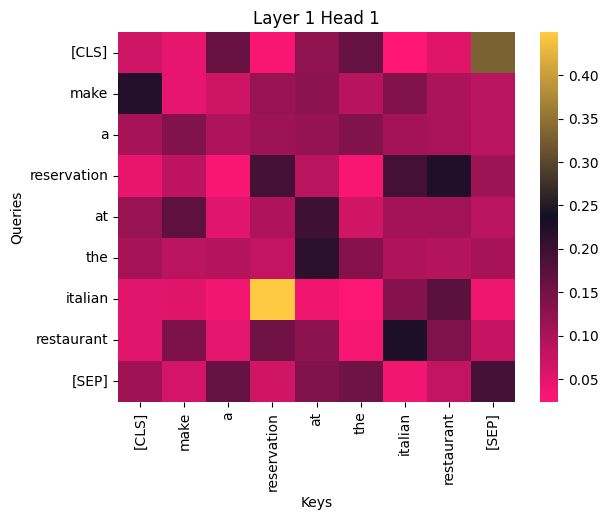

In [5]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Load pre-trained model tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Encode text
sentence = "make a reservation at the italian restaurant"
inputs = tokenizer.encode_plus(sentence, return_tensors='pt', add_special_tokens=True)

# Get model outputs
outputs = model(**inputs)
attentions = outputs.attentions

# Pluralsight colors
colors = ["#FF1675", "#130F25", "#FFC942"]
custom_colormap = LinearSegmentedColormap.from_list("custom", colors)

# Visualize the attention matrices
def plot_attention_matrix(attention, sentence, layer, head):
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap=custom_colormap)
    plt.title(f'Layer {layer+1} Head {head+1}')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.show()

layer = 0
head = 0 
plot_attention_matrix(attentions[layer][0, head].detach(), sentence, layer, head)
